# 1) Effect of Normalization, FeatureExtraction and Distance Metrics

# Libraries Used

Pandas was used to handle the Dataframes and to make the statistics calculations like mean, standard deviation, variance, skewness and mode.

Numpy was used to handle arrays and to perform different calculations.

Scikit learn an open-source machine learning library for Python and contains a helpful preprocessing module that can help us do the data preprocessing, PCA, LDA, Manifold Learning methods, accuracy, data splitting, solving algorithms.

Seaborn, matlab was used to build the subplots, plots.

Math is for all mathematical calculations

Timeit is used to measure execution time of small code snippets

# First I have did all the tasks by taking Color as output label then I took Quality as label and again followed the same steps to complete all the tasks.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)
import math
import timeit

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
#Columns/Features
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
L = 'quality'
C = 'color'
DL = D + [L]
DC = D + [C]
DLC = DL + [C]
DCL = DC + [L]

#Loading Data set
wine_r = pd.read_csv("winequality-red.csv", sep=';')
#Loading Data set
wine_w = pd.read_csv("winequality-white.csv", sep=';')
wine_w= wine_w.copy()
wine_w[C]= np.zeros(wine_w.shape[0])
wine_r[C]= np.ones(wine_r.shape[0])
wine = pd.concat([wine_w,wine_r],ignore_index=True)
final_wine = wine[DCL]
print(wine)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

# Pairplot Without Normalization With Color As Output label

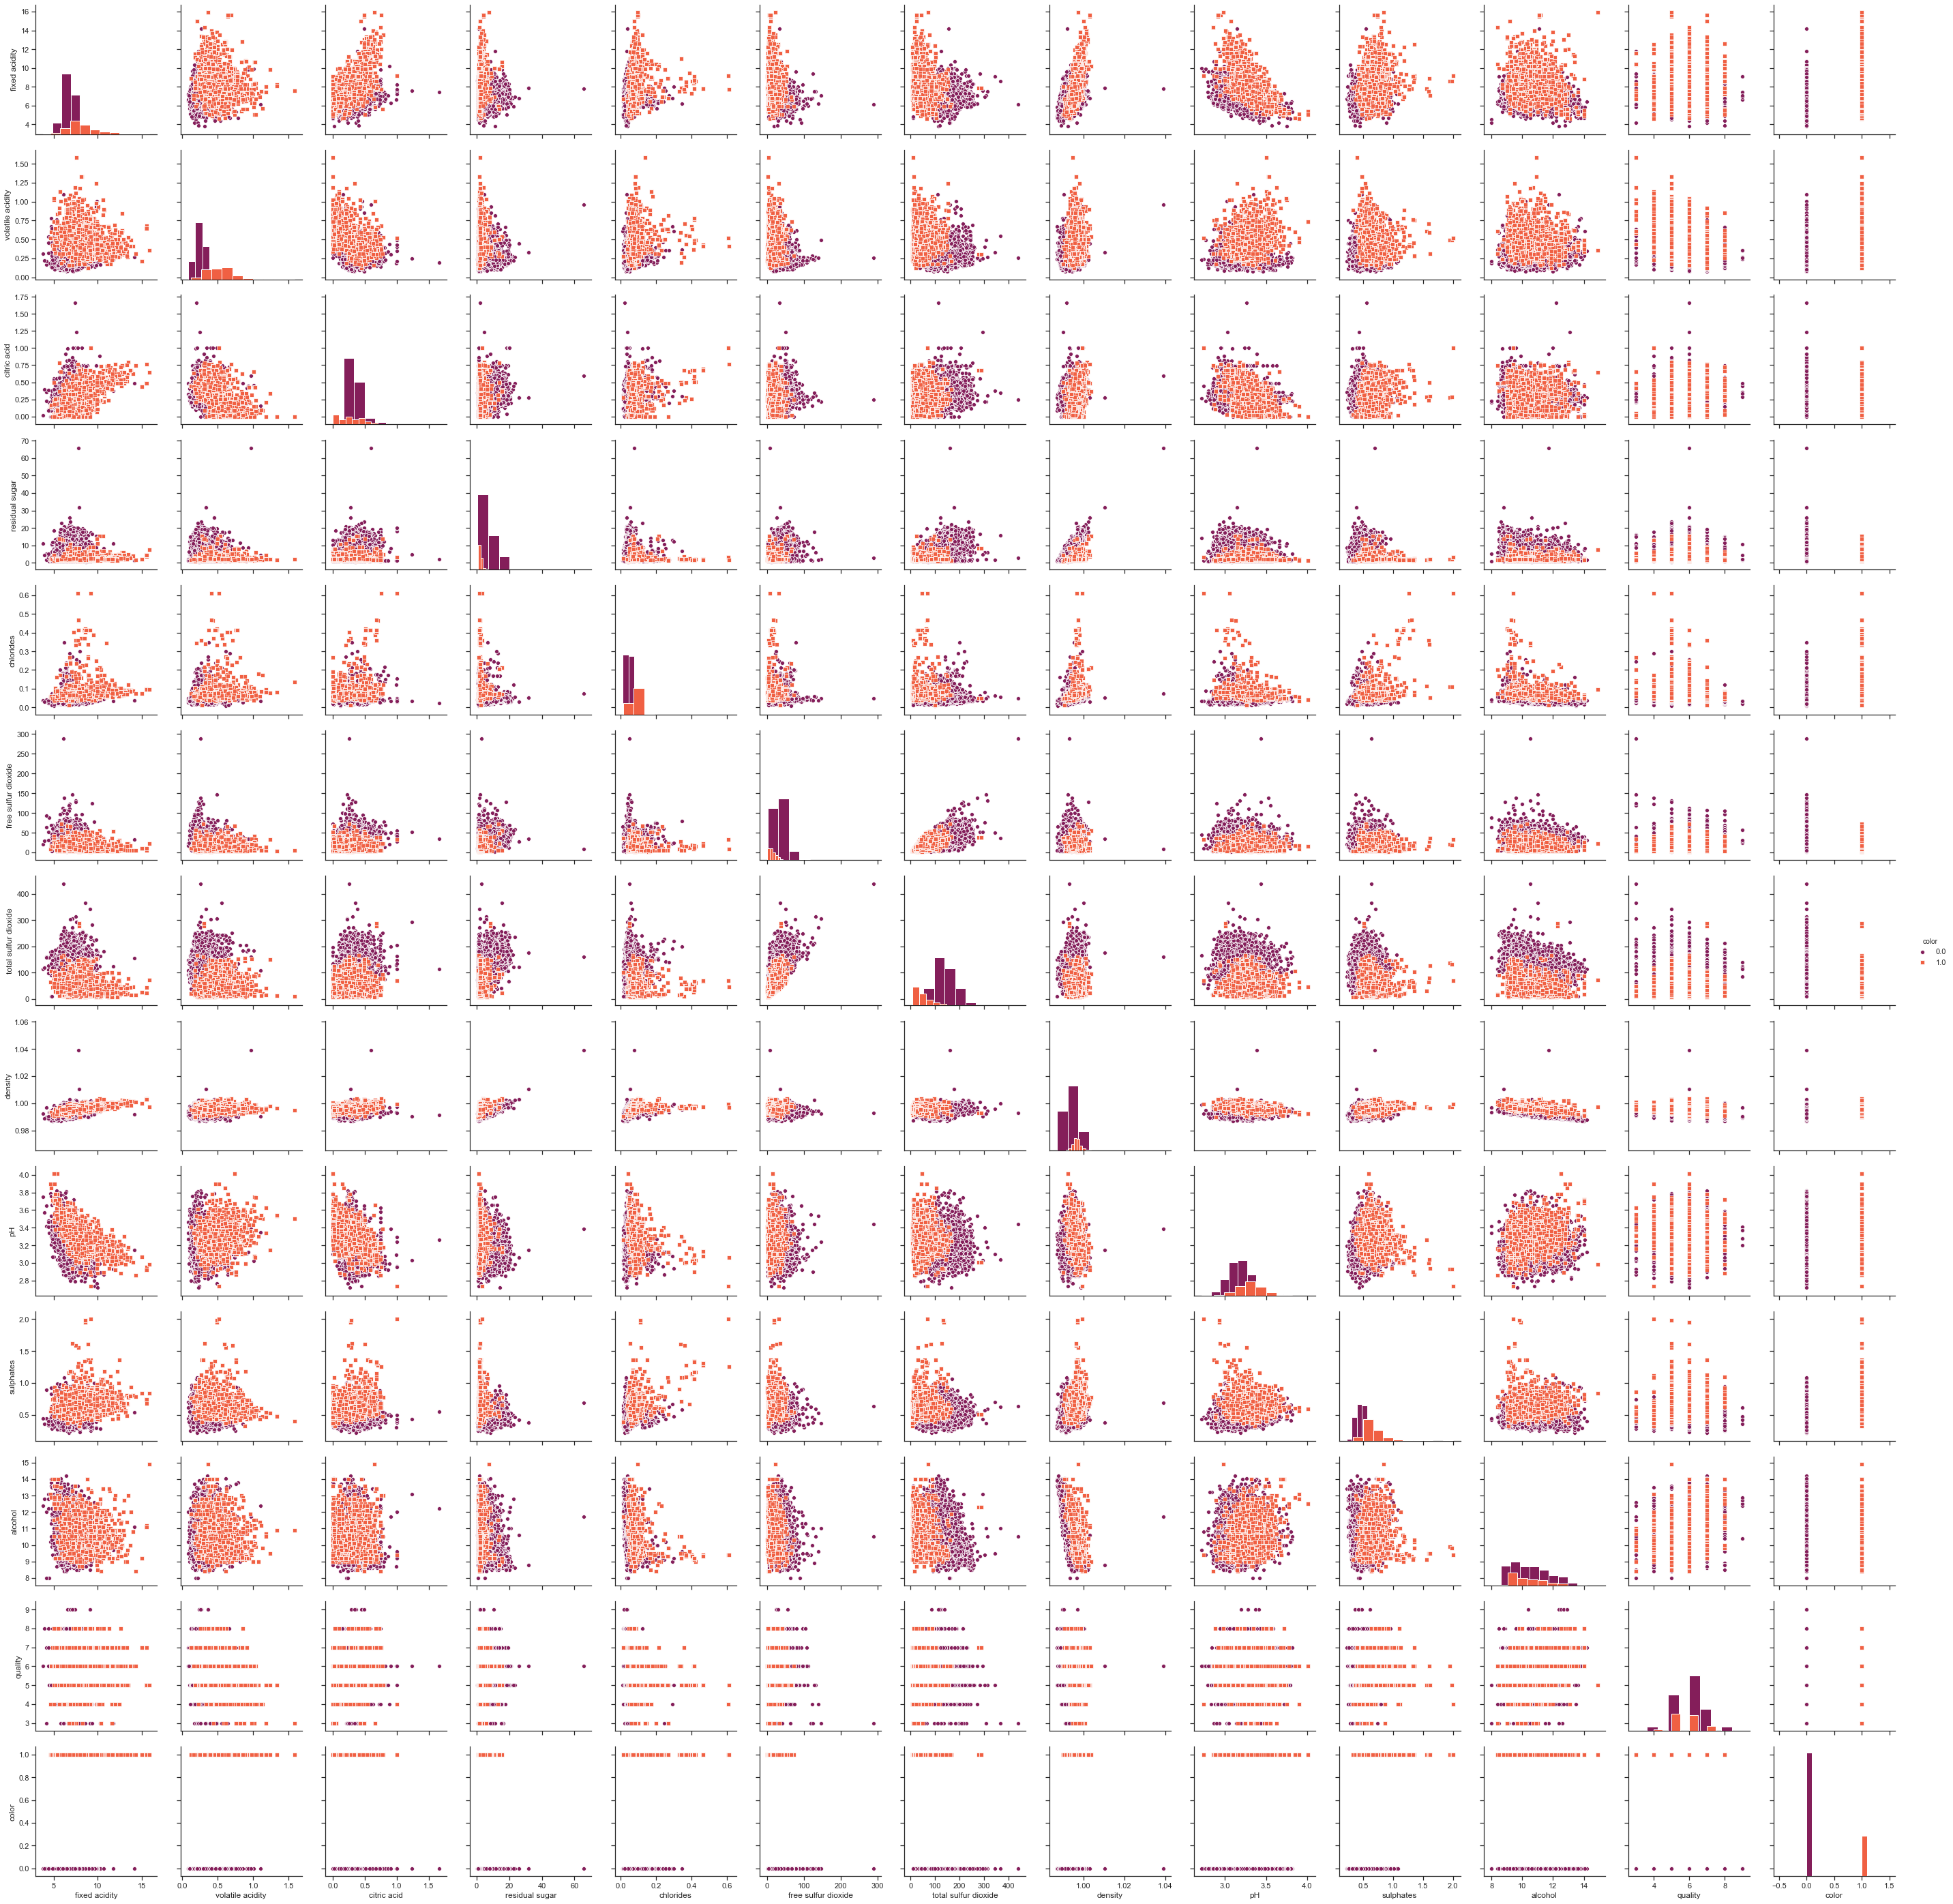

In [3]:
#Pairplot without Normalization taking color as output label
sns.pairplot(wine, diag_kind='hist', height=3, hue='color', palette="rocket", markers=["o","s"])

# Data Preprocessing With Color As Output Label

In [4]:
#Separating Features and Target
wine = wine.loc[:, :]
print(wine.head())

labels = wine['color']
wine.drop(columns = ['color'], inplace = True)
print(wine.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  color  
0      8.8        6    0.0  
1      9.5        6    0.0  

# Pairplot With Z-Score Normalization With Color As Output Label

Z-score normalization also called as standardization, it scales data to fit a normal distribution with a mean of 0 and a standard deviation of 1. This normalization can be done using the function z = preprocessing.StandardScaler().fit_transform(df), as shown below.

In [5]:
#Standardizing the features
wine = StandardScaler().fit_transform(wine)
print(wine)

[[-0.16608919 -0.42318303  0.28468605 ... -0.54617826 -1.41855821
   0.20799905]
 [-0.70607349 -0.24094936  0.14704613 ... -0.27735097 -0.83161516
   0.20799905]
 [ 0.68245757 -0.36243847  0.55996589 ... -0.61338508 -0.32852111
   0.20799905]
 ...
 [-0.70607349  1.03468634 -1.29817304 ...  1.47002637  0.42611996
   0.20799905]
 [-1.01463595  1.85473786 -1.366993   ...  1.20119908 -0.2446721
  -0.93722961]
 [-0.93749534 -0.1802048   1.04170561 ...  0.86516498  0.42611996
   0.20799905]]


From above values we could see that, z-score normalization has scaled all data to fit a normal distribution. We could see that all columns have a mean of 0 and a standard deviation of approximately 1. We could see z scores are positive and negative. Positive z score indicates its corresponding raw score is above the mean. Negative z score indicates its corresponding raw score is below the mean.

In [6]:
#Adding 'Color' label to dataset
df = pd.DataFrame(wine)
df.columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
print(df.head())
df['color'] = labels
print(df.head())
df.shape

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.166089         -0.423183     0.284686        3.206929  -0.314975   
1      -0.706073         -0.240949     0.147046       -0.807837  -0.200790   
2       0.682458         -0.362438     0.559966        0.306208  -0.172244   
3      -0.011808         -0.666161     0.009406        0.642523   0.056126   
4      -0.011808         -0.666161     0.009406        0.642523   0.056126   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.815565              0.959976  2.102214 -1.359049  -0.546178   
1            -0.931107              0.287618 -0.232332  0.506915  -0.277351   
2            -0.029599             -0.331660  0.134525  0.258120  -0.613385   
3             0.928254              1.243074  0.301278 -0.177272  -0.882212   
4             0.928254              1.243074  0.301278 -0.177272  -0.882212   

    alcohol   quality  
0 -1.418558  0.207999  
1 -0.831

(6497, 13)

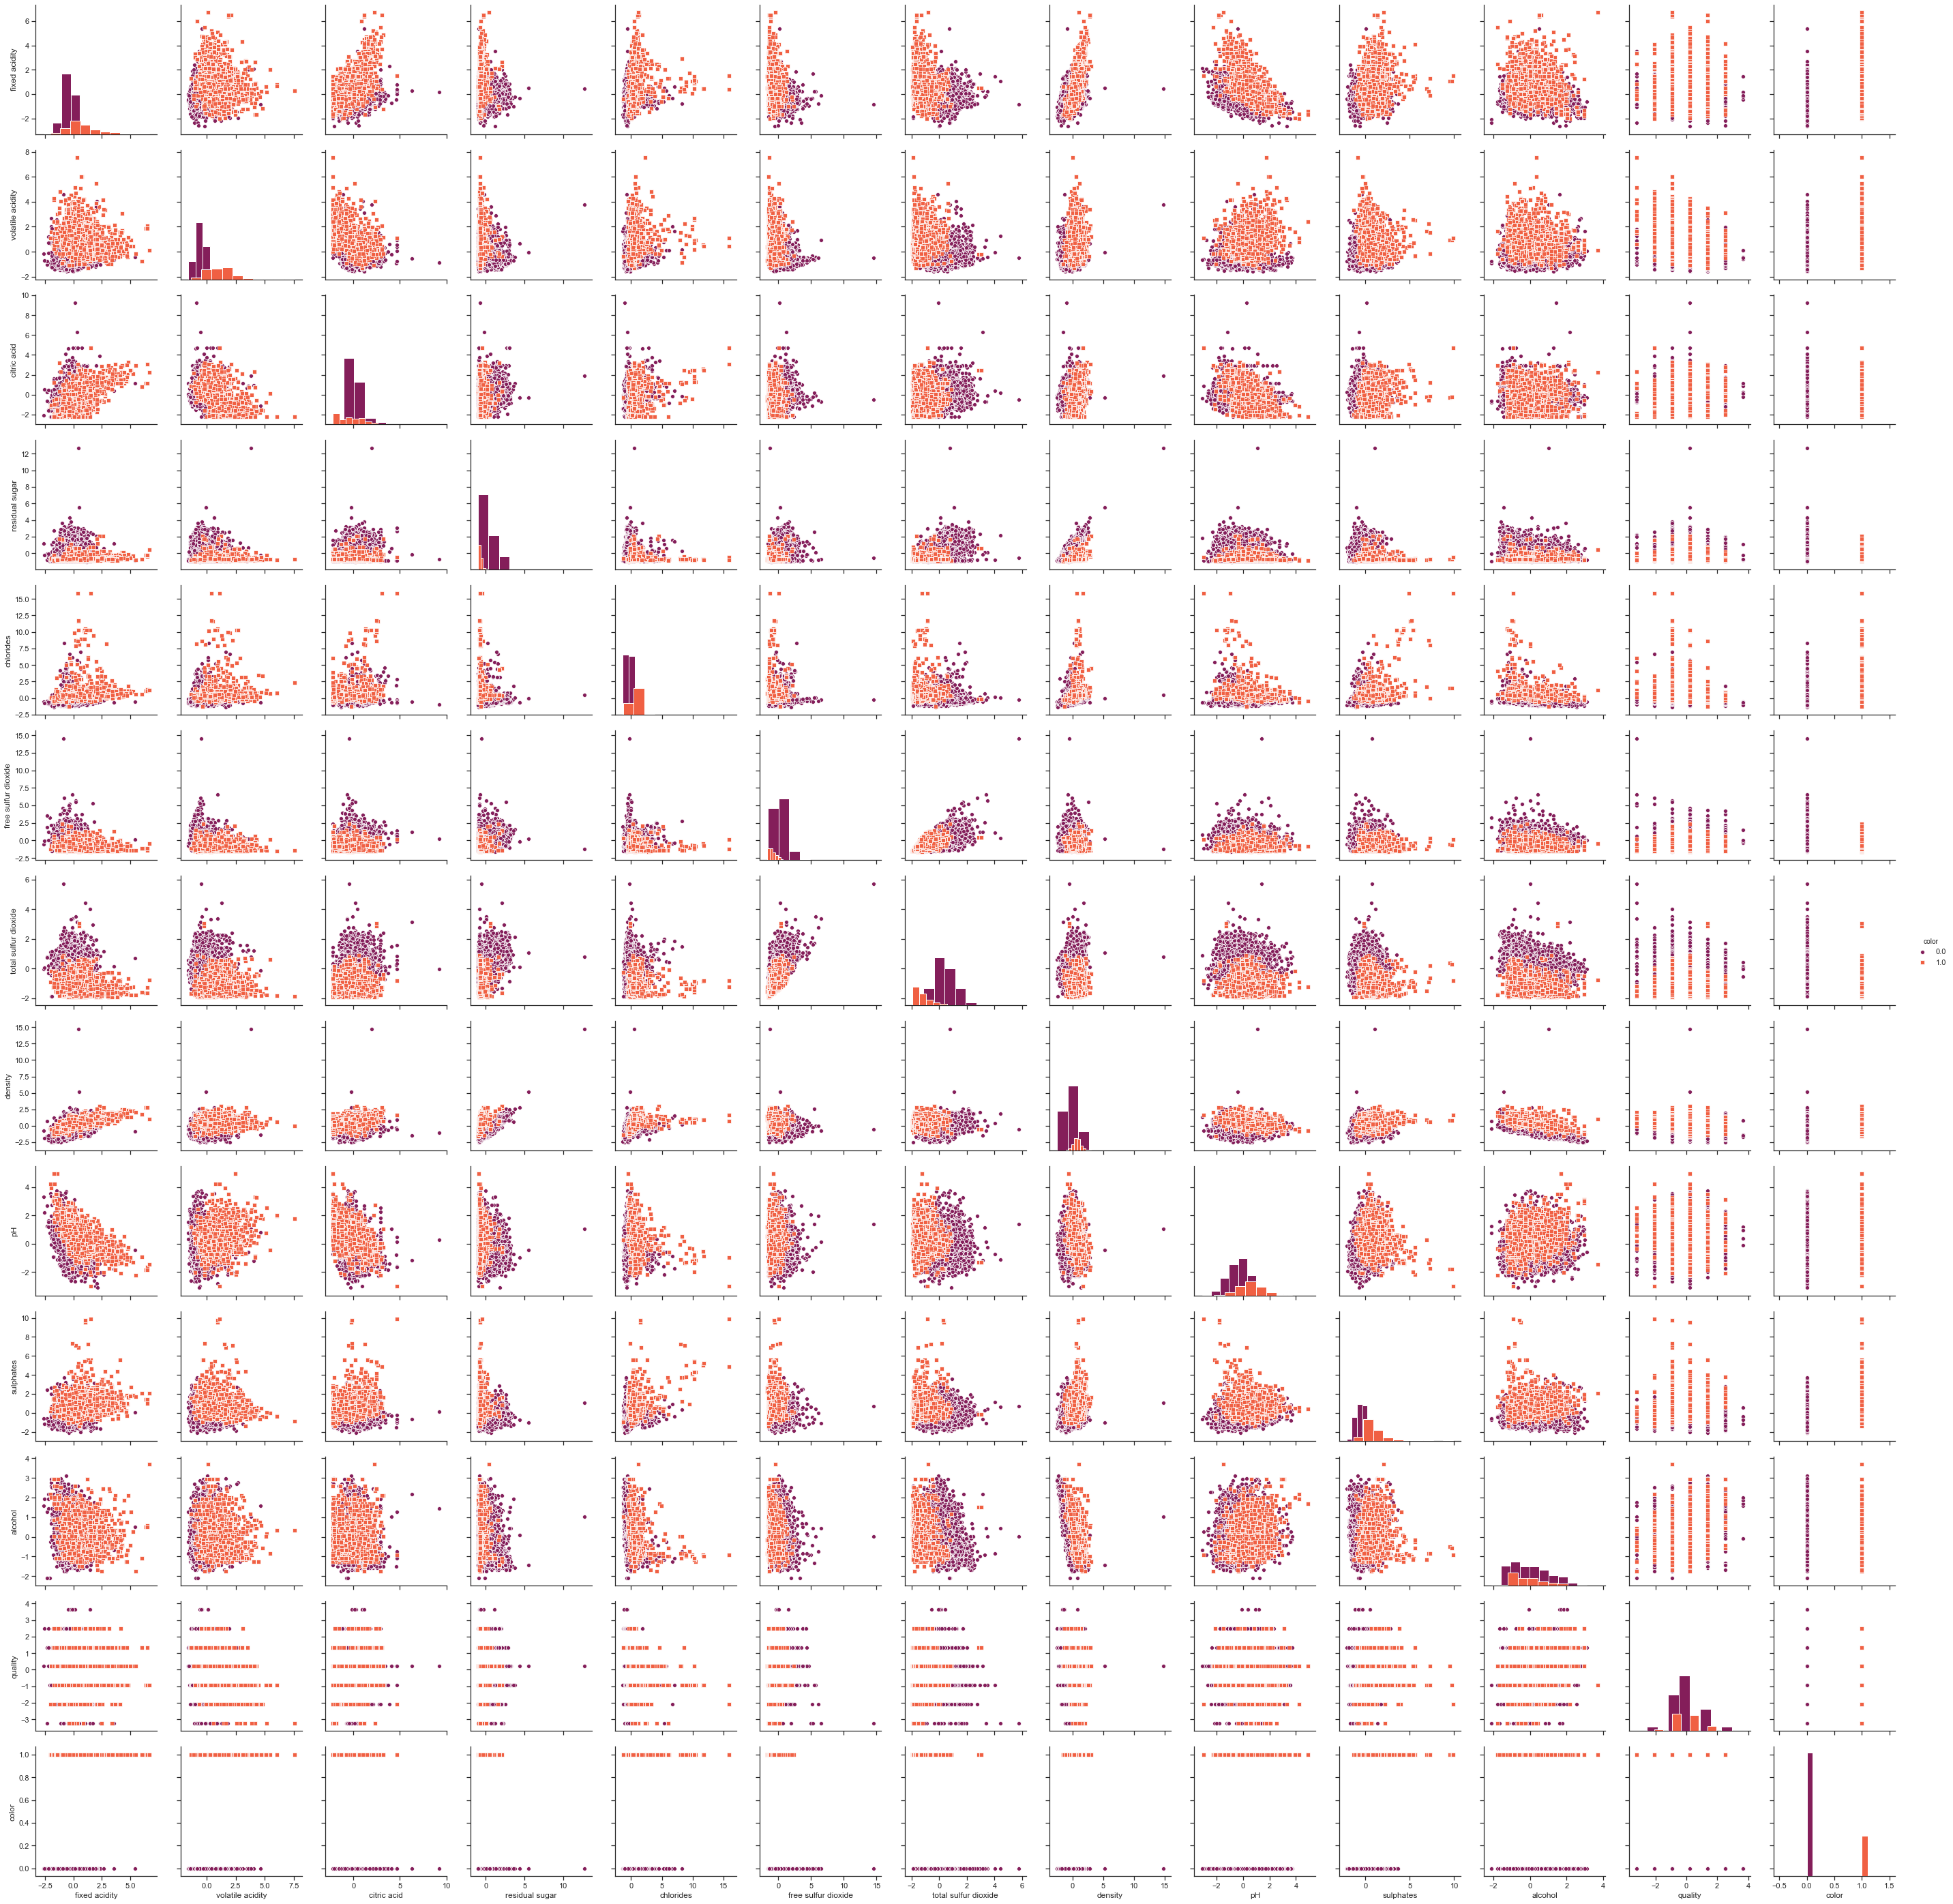

In [7]:
#Pairplot with z-score normalization With Color As Output Label
sns.pairplot(df, diag_kind='hist', height=3, hue='color', palette="rocket", markers=["o","s"])

From the above two pair plots, we could see that all features are contributing equally and data was scaled by keeping mean=0 and standard deviation=1. We could see that it is having better feaure separability due to having only 2 classes. While data still looks squished, we notice that the points are now on roughly the same scale for all the features after performing z score normalization.It used to compare raw scores that are taken from different tests especially when the data are at the interval of management. Plot between Total sulfur dioxide vs PH are having better feature separability.

Applying standardized data on dimensionality reduction methods like LDA, PCA, FDA, t-sna we can extract the features more efficiently.

# KNN Classifier With Normalized data taking Color As Output Label

In [8]:
#Splitting dataset into train-80% and test-20%
ran = 42
X_train, X_test, Y_train, Y_test = train_test_split(wine, labels, test_size=0.2, random_state = ran)
print(X_train.shape)
print(X_test.shape)

(5197, 12)
(1300, 12)


# Uniform Weighting (default)

In [9]:
#KNN Classifier using Color as output and uniform as weighting 
n_neighborslist = list(range(1,50))
col_names=['uniform']
accarray = np.zeros((len(n_neighborslist),1))

#add multiple plots to same chart, one for each weighting approach
acc_uniform=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(X_train, Y_train)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(Y_test, y_pred)
    acc_uniform.at[k,col_names[0]] = accscore

acc_uniform.describe()
acc_uniform.head()

uniform
0  0.000000
1  0.992308
2  0.990769
3  0.991538
4  0.993077

# Distance Based Weight with Manhattan Distance

In [10]:
#KNN Classifier using Color as output, P=1(manhattan) and distance as weighing scheme
n_neighborslist = list(range(1,50))
col_names=['distance']
accarray = np.zeros((len(n_neighborslist),1))

#add multiple plots to same chart, one for each weighting approach
acc_man=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = KNeighborsClassifier(n_neighbors=k, weights=col_names[0], p=1)
    neigh.fit(X_train, Y_train)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(Y_test, y_pred)
    acc_man.at[k,col_names[0]] = accscore

acc_man.describe()
acc_man.head()

distance
0  0.000000
1  0.993846
2  0.993846
3  0.994615
4  0.994615

# Distance Based Weight with Euclidean Distance

In [11]:
#KNN Classifier using Color as output, P=2(Euclidean) and distance as weighting scheme

n_neighborslist = list(range(1,50))
col_names=['distance']
accarray = np.zeros((len(n_neighborslist),1))

#add multiple plots to same chart, one for each weighting approach
acc_euc=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = KNeighborsClassifier(n_neighbors=k, weights=col_names[0],p=2)
    neigh.fit(X_train, Y_train)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(Y_test, y_pred)
    acc_euc.at[k,col_names[0]] = accscore

acc_euc.describe()
acc_euc.head()

distance
0  0.000000
1  0.992308
2  0.992308
3  0.993077
4  0.993077

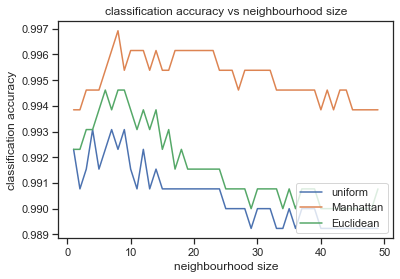

In [12]:
plt.plot(acc_uniform[1:],label="uniform")
plt.plot(acc_man[1:],label="Manhattan")
plt.plot(acc_euc[1:],label="Euclidean")
plt.legend(loc='lower right')
plt.title('classification accuracy vs neighbourhood size')
plt.xlabel('neighbourhood size')
plt.ylabel('classification accuracy')
plt.show()

From above graph, we could see that manhattan with z-score normalization has the highest accuracy at K=7, where as weighting scheme with uniform and euclidean experience a bit less accuracy when compared with manhattan. I have selected best value of K as 7 for manhattan with z-score because it is having high accuracy, confusion matrix and a better speed of convergence of rate when compared with remaining k-values. For weighting scheme as euclidean we got high accuracy at k=3,7,9 and throught the graph as k value goes on increases it results in decreasing the accuracy. For weighting scheme as uniform we got high accuracy at k=5,7,8 and throught the graph as k value goes on increases it results in decreasing the accuracy. 

# Feature Selection

Feature selection gives you a score for each feature of your data, the higher the score more important is the feature towards your output label.

Feature selection is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 4 features for the dataset.

[0.08011409 0.13467236 0.03442259 0.07411486 0.12438192 0.05242833
 0.26095149 0.1066132  0.03987506 0.06488334 0.01741005 0.01013272]


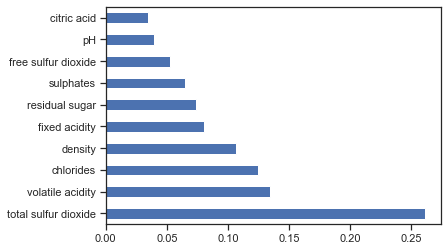

In [13]:
#Performing Feature Selection

from sklearn.ensemble import ExtraTreesClassifier
wine_data = wine
wine_data = pd.DataFrame(wine_data, columns= ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'])
model = ExtraTreesClassifier()
model.fit(wine_data,labels)
print(model.feature_importances_)
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=wine_data.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Based on above figure where color as output, i have selected total sulfur dioxide, volatile acidity, chlorides and density as top 4 features subset having high feature importance and scores. I have tested the performance of those features on the best weighting scheme manhattan with z score normalization and the results are shown below.

# Improving Performance On Normalized data Using Selected Features

In [14]:
#Separating Features and Target (taking color as output label)

X = wine_data[['volatile acidity','chlorides', 'total sulfur dioxide', 'density']]
Y = labels

In [15]:

#Splitting dataset into train-80% and test-20%
ran = 42
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = ran) 

In [16]:
#KNN Classifier using Color as output and P=1

n_neighborslist = list(range(1,50))
col_names=['distance']
accarray = np.zeros((len(n_neighborslist),1))

#add multiple plots to same chart, one for each weighting approach
acc=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = KNeighborsClassifier(n_neighbors=k, weights=col_names[0],p=1)
    neigh.fit(X_train, Y_train)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(Y_test, y_pred)
    acc.at[k,col_names[0]] = accscore

acc.describe()
acc.head()

distance
0  0.000000
1  0.988462
2  0.988462
3  0.986154
4  0.989231

Text(0, 0.5, 'classification accuracy')

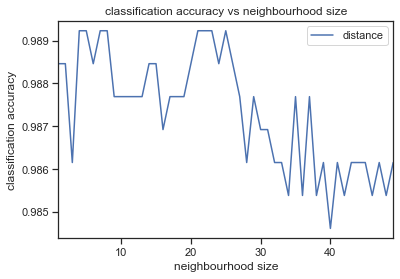

In [17]:
acc[1:].plot.line()
plt.title('classification accuracy vs neighbourhood size')
plt.xlabel('neighbourhood size')
plt.ylabel('classification accuracy')

From above graph after testing the performance using selected features with manhattan with z-score normalization, we can say that model is performing well with highest accuracy of 98.9 at k=4,5,7,8,25. However, as the k values increases it experiences fluctuations in accuracies. 

I have performed feature selection for different subset of features, different weighting schemes but none of the features except the above method gave better accuracy.

# Feature extraction using PCA With Normalized data taking Color As Output Label

Now, we perform a PCA on the standardized dataset to transform the dataset onto a 2-dimensional feature subspace.

In [18]:
#Splitting dataset into train-80% and test-20%
ran = 42
X_train, X_test, Y_train, Y_test = train_test_split(wine, labels, test_size=0.2, random_state = ran)
print(X_train.shape)
print(X_test.shape)

(5197, 12)
(1300, 12)


In [19]:
# Fitting PCA on train data and transform test data
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(5197, 5)
(1300, 5)


# Running The Same KNN Weighting Schemes For PCA

In [20]:
#KNN Classifier using PCA, Color as output and uniform as weighting 
n_neighborslist = list(range(1,50))
col_names=['uniform']
accarray = np.zeros((len(n_neighborslist),1))

#add multiple plots to same chart, one for each weighting approach
acc_uniform=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(X_train, Y_train)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(Y_test, y_pred)
    acc_uniform.at[k,col_names[0]] = accscore

acc_uniform.describe()
acc_uniform.head()

uniform
0  0.000000
1  0.990769
2  0.986154
3  0.986923
4  0.984615

In [21]:
#KNN Classifier using PCA, Color as output, P=1(manhattan) and distance as weighing scheme
n_neighborslist = list(range(1,50))
col_names=['distance']
accarray = np.zeros((len(n_neighborslist),1))

#add multiple plots to same chart, one for each weighting approach
acc_man=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = KNeighborsClassifier(n_neighbors=k, weights=col_names[0], p=1)
    neigh.fit(X_train, Y_train)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(Y_test, y_pred)
    acc_man.at[k,col_names[0]] = accscore

acc_man.describe()
acc_man.head()

distance
0  0.000000
1  0.990769
2  0.990769
3  0.990769
4  0.990769

In [22]:
#KNN Classifier using PCA, Color as output, P=2(Euclidean) and distance as weighing scheme
n_neighborslist = list(range(1,50))
col_names=['distance']
accarray = np.zeros((len(n_neighborslist),1))

#add multiple plots to same chart, one for each weighting approach
acc_euc=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = KNeighborsClassifier(n_neighbors=k, weights=col_names[0], p=2)
    neigh.fit(X_train, Y_train)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(Y_test, y_pred)
    acc_euc.at[k,col_names[0]] = accscore

acc_euc.describe()
acc_euc.head()

distance
0  0.000000
1  0.990769
2  0.990769
3  0.990000
4  0.990000

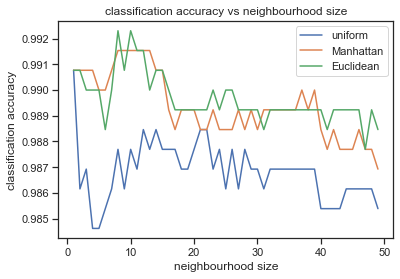

In [23]:
plt.plot(acc_uniform[1:],label="uniform")
plt.plot(acc_man[1:],label="Manhattan")
plt.plot(acc_euc[1:],label="Euclidean")
plt.legend(loc='upper right')
plt.title('classification accuracy vs neighbourhood size')
plt.xlabel('neighbourhood size')
plt.ylabel('classification accuracy')
plt.show()

From above graph, KNN after fitting the model with PCA experiences almost same accuracy whwn compared with without normalization. We could see that euclidean with z-score normalization has the highest accuracy at K=7,11 where as weighting scheme with uniform and manhattan experience a bit less accuracy when compared with eucliden. I have selected best value of K as 7 for manhattan with z-score because it is having high accuracy, confusion matrix and a better speed of convergence of rate when compared with remaining k-values. For weighting scheme as manhattan we got high accuracy at k=7,13 and throught the graph as k value goes on increases it results in decreasing the accuracy. For weighting scheme as uniform we got high accuracy at k=2 and throught the graph as k value goes on increases it results in decreasing the accuracy. 

# Feature extraction using LDA With Normalized data taking Color As Output Label

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

sklearn_lda = LDA()
#X_lda = sklearn_lda.fit_transform(wine, labels)
X_lda = sklearn_lda.fit(wine, labels)
LDA_comp = X_lda.transform(wine)
print(LDA_comp.shape)

(6497, 1)


In [25]:
#Splitting dataset into train-80% and test-20%
ran = 42
X_train, X_test, Y_train, Y_test = train_test_split(LDA_comp, labels, test_size=0.2, random_state = ran)
print(X_train.shape)
print(X_test.shape)

(5197, 1)
(1300, 1)


# Running The Same KNN Weighting Schemes For LDA

In [26]:
#KNN Classifier using PCA, Color as output and uniform as weighting 
n_neighborslist = list(range(1,50))
col_names=['uniform']
accarray = np.zeros((len(n_neighborslist),1))

#add multiple plots to same chart, one for each weighting approach
acc_uniform=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(X_train, Y_train)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(Y_test, y_pred)
    acc_uniform.at[k,col_names[0]] = accscore

acc_uniform.describe()
acc_uniform.head()

uniform
0  0.000000
1  0.991538
2  0.991538
3  0.991538
4  0.992308

In [27]:
#KNN Classifier using PCA, Color as output, P=1(manhattan) and distance as weighing scheme
n_neighborslist = list(range(1,50))
col_names=['distance']
accarray = np.zeros((len(n_neighborslist),1))

#add multiple plots to same chart, one for each weighting approach
acc_man=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = KNeighborsClassifier(n_neighbors=k, weights=col_names[0], p=1)
    neigh.fit(X_train, Y_train)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(Y_test, y_pred)
    acc_man.at[k,col_names[0]] = accscore

acc_man.describe()
acc_man.head()

distance
0  0.000000
1  0.991538
2  0.991538
3  0.992308
4  0.993077

In [28]:
#KNN Classifier using PCA, Color as output, P=2(Euclidean) and distance as weighing scheme
n_neighborslist = list(range(1,50))
col_names=['distance']
accarray = np.zeros((len(n_neighborslist),1))

#add multiple plots to same chart, one for each weighting approach
acc_euc=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = KNeighborsClassifier(n_neighbors=k, weights=col_names[0], p=2)
    neigh.fit(X_train, Y_train)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(Y_test, y_pred)
    acc_euc.at[k,col_names[0]] = accscore

acc_euc.describe()
acc_euc.head()

distance
0  0.000000
1  0.991538
2  0.991538
3  0.992308
4  0.993077

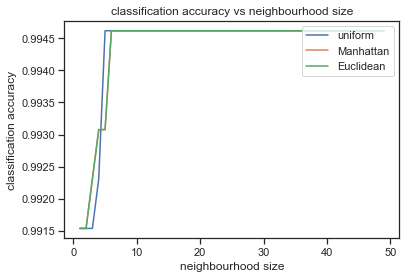

In [29]:
plt.plot(acc_uniform[1:],label="uniform")
plt.plot(acc_man[1:],label="Manhattan")
plt.plot(acc_euc[1:],label="Euclidean")
plt.legend(loc='upper right')
plt.title('classification accuracy vs neighbourhood size')
plt.xlabel('neighbourhood size')
plt.ylabel('classification accuracy')
plt.show()

From above graph, KNN after fitting the model with LDA experiences a better accuracy when compared with KNN with PCA. We could see that all the three wighting schemes are giving almost same accuracies at same or consecutive values. Euclidean and Manhattan in LDA are giving same accuracies throughout the graph. Feature extraction in LDA is having performed very well when compared with PCA. At K=7 we got higest accuracy in LDA where as in PCA we got less accuracy.

# Performing All The Above Tasks With Quality As Output Label

In [52]:
#Displaying the Data with quality as output label
print(final_wine.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  color  quality  
0      8.8    0.0        6  
1      9.5    0.0        6  

# Pairplot Without Normalization taking Quality as output

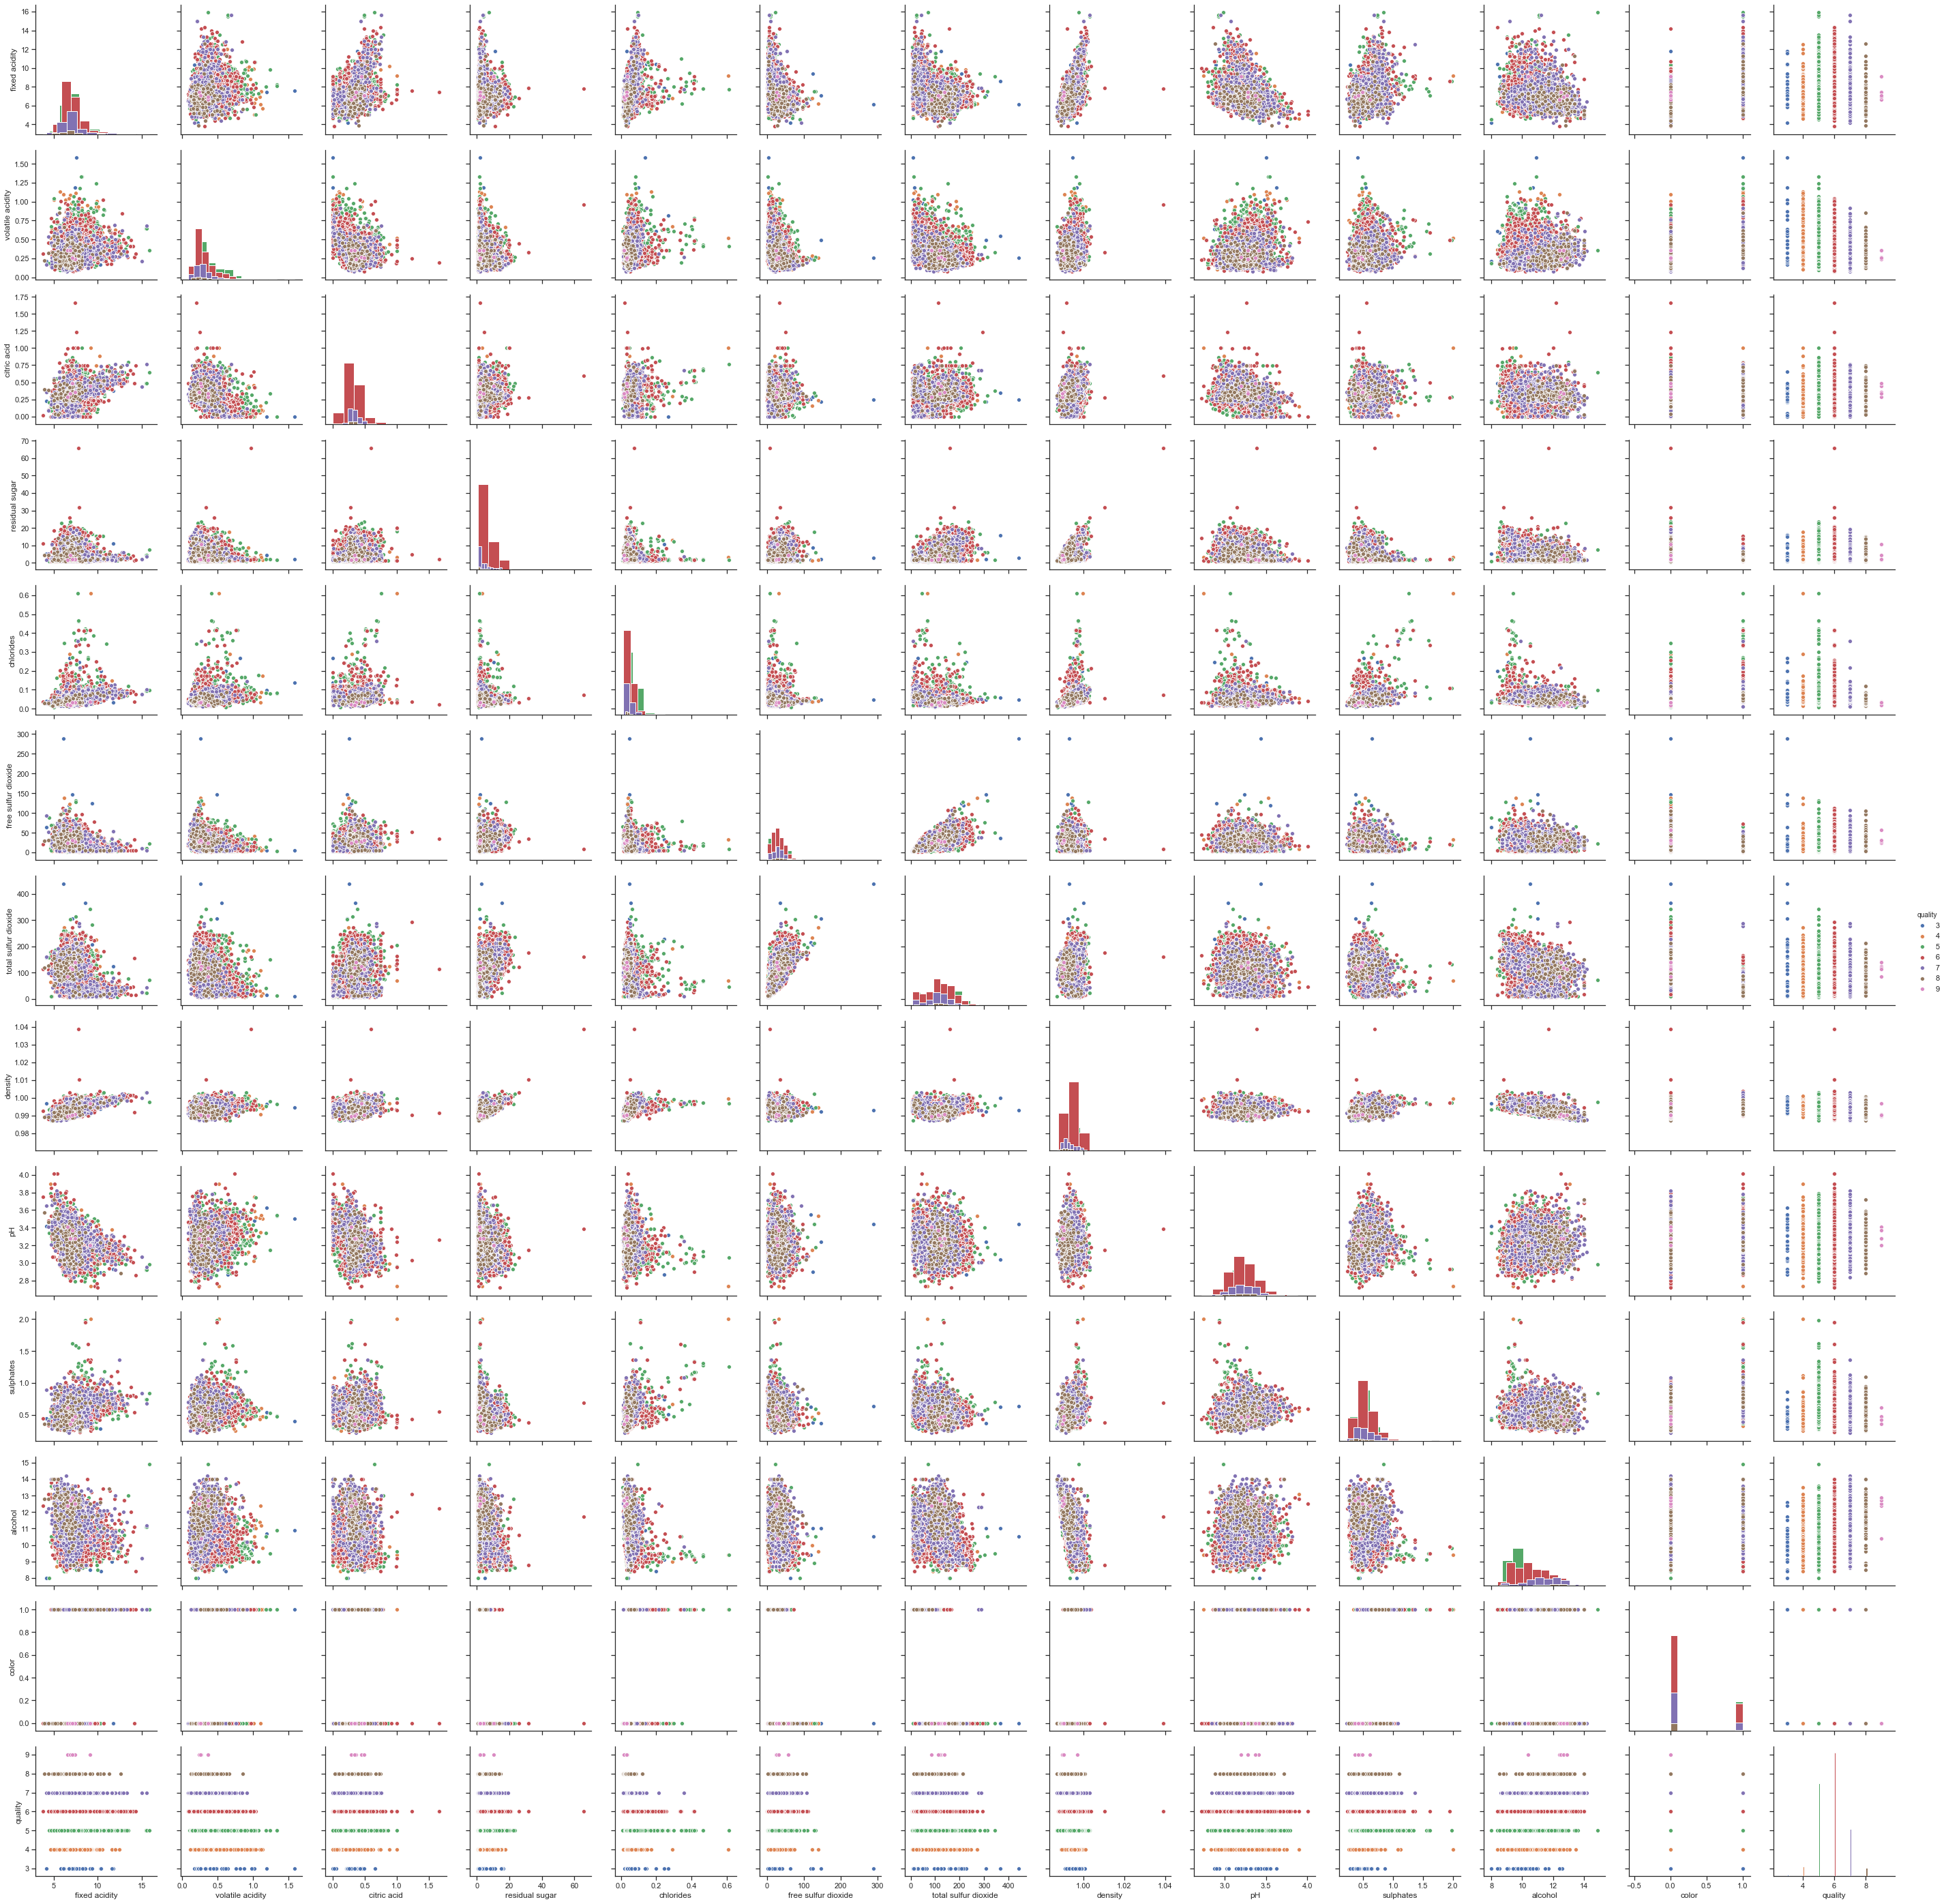

In [53]:
#Pairplot without Normalization taking color as output label
sns.pairplot(final_wine, diag_kind='hist', height=3, hue='quality')

# Data Preprocessing With Quality as Output Label

In [54]:
#Separating Features and Target
final_wine = final_wine.loc[:, :]
print(final_wine.head())

labels = final_wine['quality']
final_wine.drop(columns = ['quality'], inplace = True)
print(final_wine.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  color  quality  
0      8.8    0.0        6  
1      9.5    0.0        6  

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Pairplot With Z-Score Normalization With Quality As Output Label

Z-score normalization also called as standardization, it scales data to fit a normal distribution with a mean of 0 and a standard deviation of 1. This normalization can be done using the function z = preprocessing.StandardScaler().fit_transform(df), as shown below.

In [55]:
#Standardizing the features
final_wine = StandardScaler().fit_transform(final_wine)
print(final_wine)

[[-0.16608919 -0.42318303  0.28468605 ... -0.54617826 -1.41855821
  -0.57136659]
 [-0.70607349 -0.24094936  0.14704613 ... -0.27735097 -0.83161516
  -0.57136659]
 [ 0.68245757 -0.36243847  0.55996589 ... -0.61338508 -0.32852111
  -0.57136659]
 ...
 [-0.70607349  1.03468634 -1.29817304 ...  1.47002637  0.42611996
   1.75018984]
 [-1.01463595  1.85473786 -1.366993   ...  1.20119908 -0.2446721
   1.75018984]
 [-0.93749534 -0.1802048   1.04170561 ...  0.86516498  0.42611996
   1.75018984]]


From above values we could see that, z-score normalization has scaled all data to fit a normal distribution. We could see that all columns have a mean of 0 and a standard deviation of approximately 1. We could see z scores are positive and negative. Positive z score indicates its corresponding raw score is above the mean. Negative z score indicates its corresponding raw score is below the mean.

In [56]:
#Adding 'quality' label to dataset
df_quality = pd.DataFrame(final_wine)
df_quality.columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'color']
print(df_quality.head())
df_quality['quality'] = labels
print(df_quality.head())
df_quality.shape

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.166089         -0.423183     0.284686        3.206929  -0.314975   
1      -0.706073         -0.240949     0.147046       -0.807837  -0.200790   
2       0.682458         -0.362438     0.559966        0.306208  -0.172244   
3      -0.011808         -0.666161     0.009406        0.642523   0.056126   
4      -0.011808         -0.666161     0.009406        0.642523   0.056126   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.815565              0.959976  2.102214 -1.359049  -0.546178   
1            -0.931107              0.287618 -0.232332  0.506915  -0.277351   
2            -0.029599             -0.331660  0.134525  0.258120  -0.613385   
3             0.928254              1.243074  0.301278 -0.177272  -0.882212   
4             0.928254              1.243074  0.301278 -0.177272  -0.882212   

    alcohol     color  
0 -1.418558 -0.571367  
1 -0.831

(6497, 13)

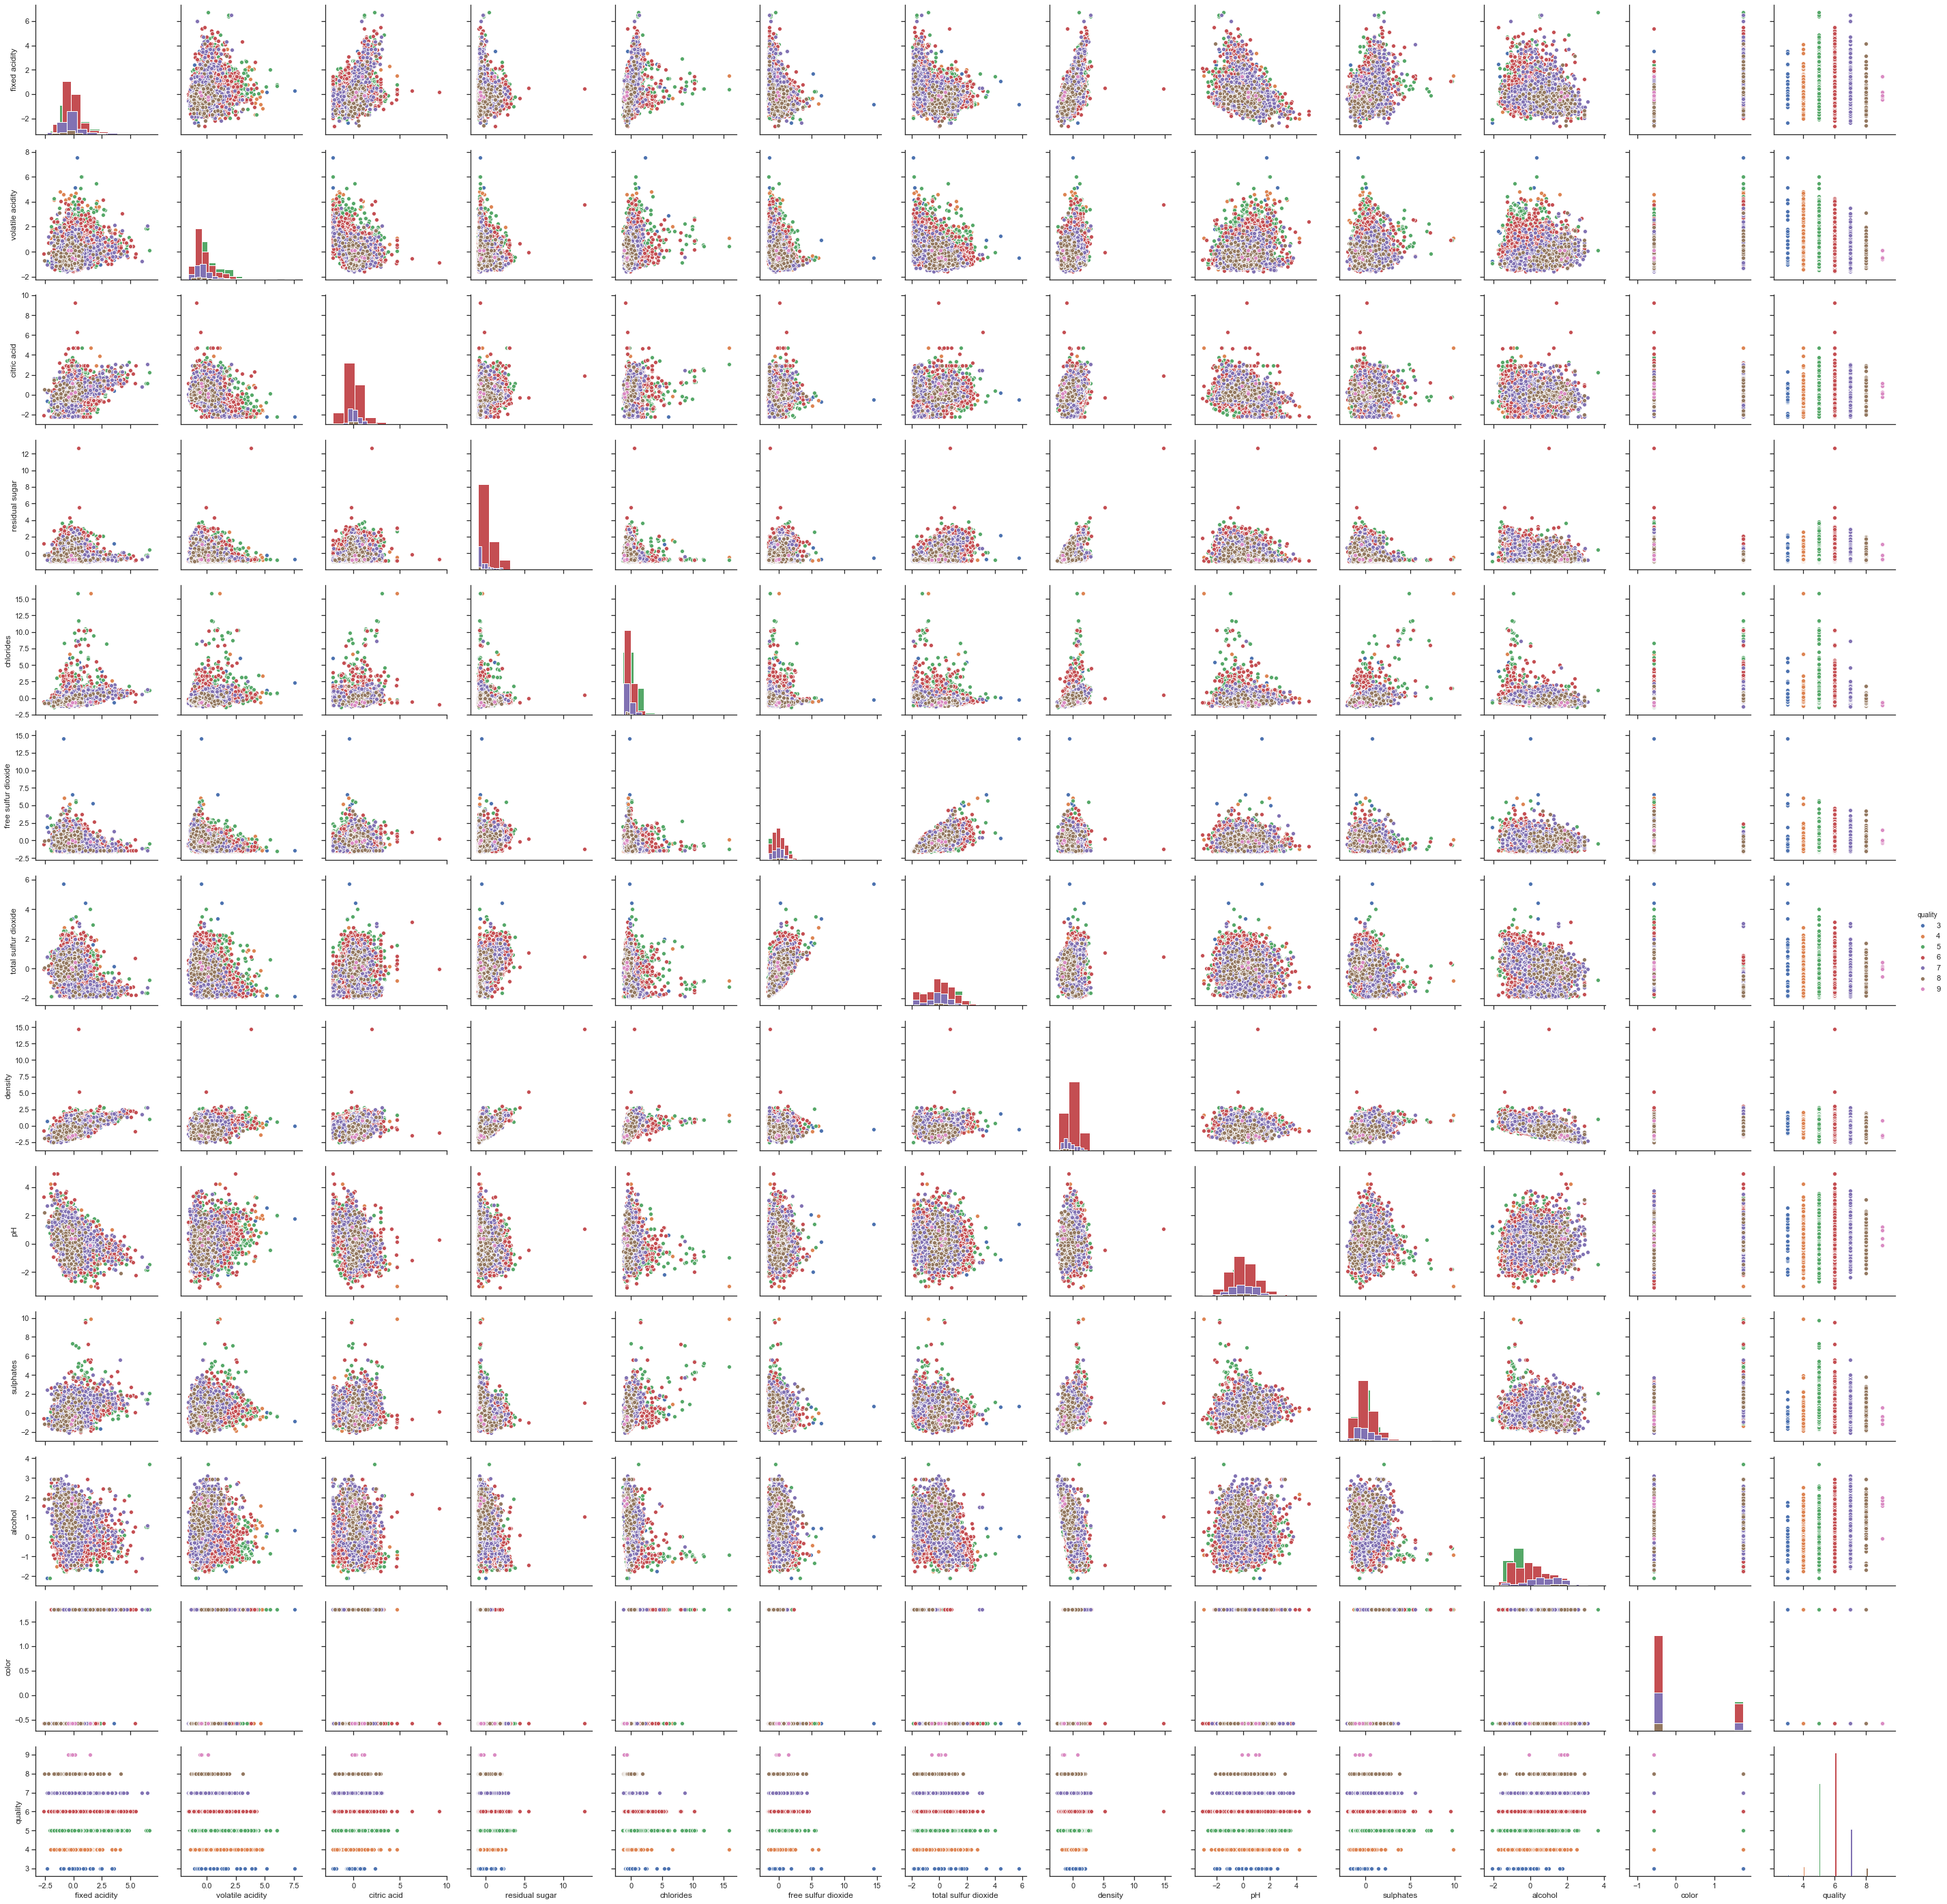

In [57]:
#Pairplot with z-score normalization
sns.pairplot(df_quality, diag_kind='hist', height=3, hue='quality')

From the above two pair plots,  we can see that due to more number of classes the feature separability is not clear and looking like a mesh. We could see that all features are contributing equally and data was scaled by keeping mean=0 and standard deviation=1. While data still looks squished, we notice that the points are now on roughly the same scale for all the features after performing z score normalization.It used to compare raw scores that are taken from different tests especially when the data are at the interval of management.

Applying standardized data on dimensionality reduction methods like LDA, PCA, FDA, t-sna we can extract the features more efficiently.

# KNN Classifier With Normalized data taking Quality As Output Label

In [58]:
#Splitting dataset into train-80% and test-20%
ran = 42
X_train, X_test, Y_train, Y_test = train_test_split(final_wine, labels, test_size=0.2, random_state = ran)
print(X_train.shape)
print(X_test.shape)

(5197, 12)
(1300, 12)


# Uniform Weighting (default)

In [59]:
#KNN Classifier using Quality as output and uniform as weighting 
n_neighborslist = list(range(1,50))
col_names=['uniform']
accarray = np.zeros((len(n_neighborslist),1))

#add multiple plots to same chart, one for each weighting approach
acc_uniform=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(X_train, Y_train)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(Y_test, y_pred)
    acc_uniform.at[k,col_names[0]] = accscore

acc_uniform.describe()
acc_uniform.head()

uniform
0  0.000000
1  0.630000
2  0.582308
3  0.568462
4  0.571538

# Distance Based Weight with Manhattan Distance

In [63]:
#KNN Classifier using Quality as output, P=1(manhattan) and distance as weighing scheme
n_neighborslist = list(range(1,50))
col_names=['distance']
accarray = np.zeros((len(n_neighborslist),1))

#add multiple plots to same chart, one for each weighting approach
acc_man=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = KNeighborsClassifier(n_neighbors=k, weights=col_names[0], p=1)
    neigh.fit(X_train, Y_train)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(Y_test, y_pred)
    acc_man.at[k,col_names[0]] = accscore

acc_man.describe()
acc_man.head()

distance
0  0.000000
1  0.641538
2  0.641538
3  0.657692
4  0.652308

# Distance Based Weight with Euclidean Distance

In [64]:
#KNN Classifier using Quality as output, P=2(Euclidean) and distance as weighting scheme

n_neighborslist = list(range(1,50))
col_names=['distance']
accarray = np.zeros((len(n_neighborslist),1))

#add multiple plots to same chart, one for each weighting approach
acc_euc=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = KNeighborsClassifier(n_neighbors=k, weights=col_names[0],p=2)
    neigh.fit(X_train, Y_train)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(Y_test, y_pred)
    acc_euc.at[k,col_names[0]] = accscore

acc_euc.describe()
acc_euc.head()

distance
0  0.000000
1  0.630000
2  0.630000
3  0.663077
4  0.661538

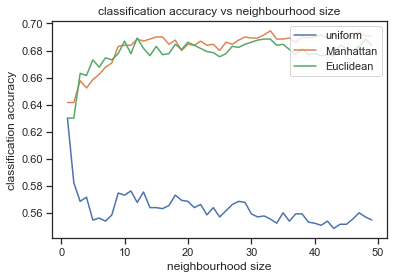

In [65]:
plt.plot(acc_uniform[1:],label="uniform")
plt.plot(acc_man[1:],label="Manhattan")
plt.plot(acc_euc[1:],label="Euclidean")
plt.legend(loc='upper right')
plt.title('classification accuracy vs neighbourhood size')
plt.xlabel('neighbourhood size')
plt.ylabel('classification accuracy')
plt.show()

From above graph, we could see that manhattan with z-score normalization is having high accuracy with better speed of convergence, confusion matrix of almost 70% at k=33 where as euclidean is sightly less. In uniform weighting scheme, As the k value increases there is a continuous decrease in accuracy of graph. In Manhattan and Euclidean, as the k value increases accuracy will increases and results in less classification error. We know that in KNN, large value of K results in high bias and low variance, underfits the model, smoother decision boundaries. 

# Feature Selection

[0.07860234 0.09979146 0.08230328 0.08379656 0.08187787 0.08589168
 0.08849138 0.09051802 0.08238792 0.08519178 0.13393146 0.00721624]


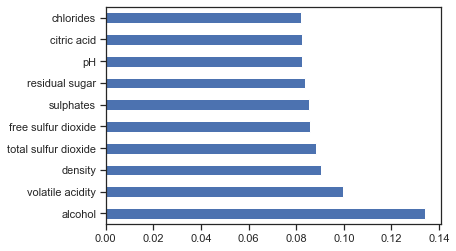

In [66]:
#Performing Feature Selection
from sklearn.ensemble import ExtraTreesClassifier
wine_da = final_wine
wine_da = pd.DataFrame(wine_da, columns= ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'color'])
model = ExtraTreesClassifier()
model.fit(wine_da,labels)
print(model.feature_importances_)
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=wine_da.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Based on above figure where quality as output, i have selected total sulfur dioxide, volatile acidity, alcohol and density as top 4 features subset having high feature importance and scores. I have tested the performance of those features on the best weighting scheme manhattan, euclidean with z score normalization and the results are shown below.

In [67]:
#Separating Features and Target (taking color as output label)
#X = Wine_data[['fixed acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide']]
#X = Wine_data[['fixed acidity', 'chlorides', 'total sulfur dioxide', 'alcohol']]
X = wine_da[['volatile acidity','alcohol', 'total sulfur dioxide', 'density']]
#X = Wine_data[['pH', 'sulphates', 'alcohol', 'quality']]
#X = Wine_data.iloc[:,0:12]
Y = labels

# Improving Performance With Normalized data Using Selected Features

In [68]:
#Splitting dataset into train-80% and test-20%
ran = 42
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = ran) 

In [75]:
#KNN Classifier using Quality as output and P=2

n_neighborslist = list(range(1,50))
col_names=['distance']
accarray = np.zeros((len(n_neighborslist),1))

#add multiple plots to same chart, one for each weighting approach
acc=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = KNeighborsClassifier(n_neighbors=k, weights=col_names[0],p=2)
    neigh.fit(X_train, Y_train)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(Y_test, y_pred)
    acc.at[k,col_names[0]] = accscore

acc.describe()
acc.head()

distance
0  0.000000
1  0.638462
2  0.638462
3  0.653077
4  0.657692

Text(0, 0.5, 'classification accuracy')

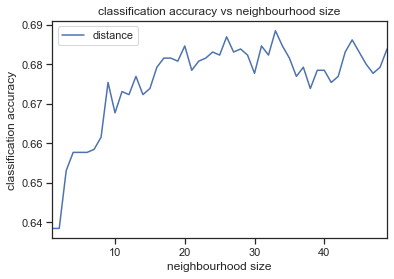

In [76]:
acc[1:].plot.line()
plt.title('classification accuracy vs neighbourhood size')
plt.xlabel('neighbourhood size')
plt.ylabel('classification accuracy')

From above graph, after performing feature selction on euclidean and manhattan with top 4 subset of features we can say that euclidean is performing better when compared with manhattan and uniform. At k=33, we got the accuracy of almost 69% which is better when compared with all the features. We found that four features whch we have selected are performing better than considering all the features. As the K value incrases the accuracy also goes on increasing with decreasing classification error.

# Feature Extraction Using PCA With Normalized data taking Quality As Output Label

In [77]:
#Splitting dataset into train-80% and test-20%
ran = 42
X_train, X_test, Y_train, Y_test = train_test_split(final_wine, labels, test_size=0.2, random_state = ran)
print(X_train.shape)
print(X_test.shape)

(5197, 12)
(1300, 12)


In [79]:
# Fitting PCA on train data and transform test data
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(5197, 5)
(1300, 5)


In [80]:
df_reduced12 = pd.DataFrame(X_train)
df_reduced12.columns = ['Projection on PC1','Projection on PC2','Projection on PC3','Projection on PC4','Projection on PC5']
df_reduced12['quality'] = labels
print(df_reduced12.head())
df_reduced12.shape

   Projection on PC1  Projection on PC2  Projection on PC3  Projection on PC4  \
0          -2.134056           1.232037          -0.317865          -0.177378   
1          -1.161441          -0.006418           1.641107          -1.321027   
2          -0.368430          -0.685514          -0.004543          -0.033876   
3          -1.974761          -0.697012           0.626675          -1.234967   
4           5.678325           3.510540           1.855757           3.012799   

   Projection on PC5  quality  
0          -0.586955        6  
1          -0.711545        6  
2          -1.975824        6  
3          -0.272706        6  
4          -5.433730        6  


(5197, 6)

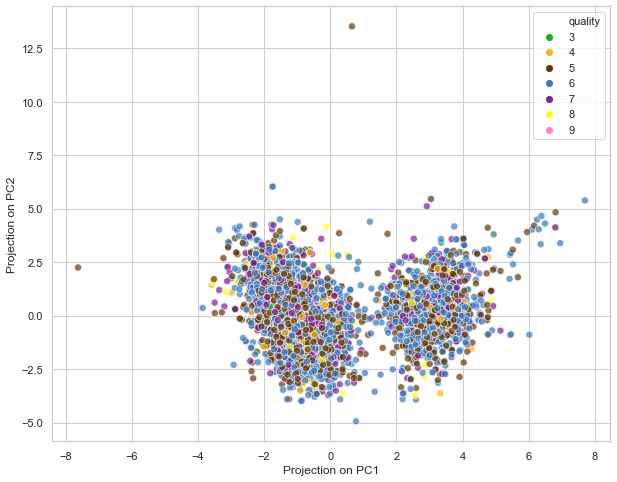

In [81]:
#Plotting PCA1 and PCA2
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 8))
colors = ["green", "amber", "brown", "windows blue", "purple", "yellow", "pink"]
sns.scatterplot(ax = ax, x="Projection on PC1", y="Projection on PC2", alpha = 0.7, s = 50,
                hue="quality", data=df_reduced12, palette=sns.xkcd_palette(colors))

From above scatter plot between PC1 vs PC2, we can say that separability is not clear and we cannot diiferentiate the classes accurately due to closely meshed. It is having high variance and high bias, high error and less speed of convergence which is not suitable. In order to get better separability we need to use optimization techniques and different dimensionality reduction method like LDA. 

# Running The Same KNN Weighting Schemes For PCA

In [119]:
#KNN Classifier using PCA, Quality as output and uniform as weighting 
n_neighborslist = list(range(1,50))
col_names=['uniform']
accarray = np.zeros((len(n_neighborslist),1))

#add multiple plots to same chart, one for each weighting approach
acc_uniform=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(X_train, Y_train)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(Y_test, y_pred)
    acc_uniform.at[k,col_names[0]] = accscore

acc_uniform.describe()
acc_uniform.head()

uniform
0  0.000000
1  0.633077
2  0.560769
3  0.539231
4  0.551538

In [120]:
#KNN Classifier using PCA, Quality as output, P=1(manhattan) and distance as weighing scheme
n_neighborslist = list(range(1,50))
col_names=['distance']
accarray = np.zeros((len(n_neighborslist),1))

#add multiple plots to same chart, one for each weighting approach
acc_man=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = KNeighborsClassifier(n_neighbors=k, weights=col_names[0], p=1)
    neigh.fit(X_train, Y_train)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(Y_test, y_pred)
    acc_man.at[k,col_names[0]] = accscore

acc_man.describe()
acc_man.head()

distance
0  0.000000
1  0.627692
2  0.627692
3  0.618462
4  0.630000

In [121]:
#KNN Classifier using PCA, Quality as output, P=2(Euclidean) and distance as weighing scheme
n_neighborslist = list(range(1,50))
col_names=['distance']
accarray = np.zeros((len(n_neighborslist),1))

#add multiple plots to same chart, one for each weighting approach
acc_euc=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = KNeighborsClassifier(n_neighbors=k, weights=col_names[0], p=2)
    neigh.fit(X_train, Y_train)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(Y_test, y_pred)
    acc_euc.at[k,col_names[0]] = accscore

acc_euc.describe()
acc_euc.head()

distance
0  0.000000
1  0.633077
2  0.633077
3  0.633846
4  0.643846

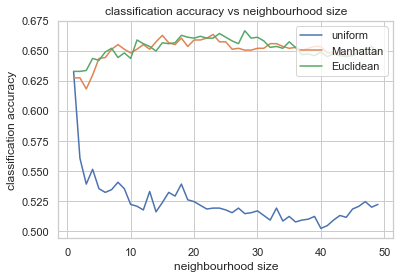

In [122]:
plt.plot(acc_uniform[1:],label="uniform")
plt.plot(acc_man[1:],label="Manhattan")
plt.plot(acc_euc[1:],label="Euclidean")
plt.legend(loc='upper right')
plt.title('classification accuracy vs neighbourhood size')
plt.xlabel('neighbourhood size')
plt.ylabel('classification accuracy')
plt.show()

From above plot, we can say that Euclidean with Z-score normalization performs better with high accuracy of 67% at k=27 where as manhattan has slightly less accuracy. In case of uniform weighting as the k increases the accuracy goes on decreases with increasing error. Feature selection is performing better than PCA method.

# Feature extraction using LDA With Normalized data taking Quality As Output Label

In [123]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

sklearn_lda = LDA(n_components = 5)
X_lda = sklearn_lda.fit(final_wine, labels)
LDA_comp = X_lda.transform(final_wine)
LDA_comp.shape

(6497, 5)

In [124]:
LDA_df = pd.DataFrame(LDA_comp,columns=['LDA Comp1','LDA Comp2','LDA Comp3','LDA Comp4','LDA Comp5'])
LDA_df['quality'] = labels
LDA_df.head()

LDA Comp1  LDA Comp2  LDA Comp3  LDA Comp4  LDA Comp5  quality
0  -0.752078   1.466209  -0.024718  -0.371827   1.626055        6
1  -1.445150  -0.392049  -1.788109   0.248460   0.098989        6
2   0.123015  -0.911451   0.329427  -0.894688  -0.878564        6
3  -0.288961   0.721769   0.798431  -0.349889   0.223399        6
4  -0.288961   0.721769   0.798431  -0.349889   0.223399        6

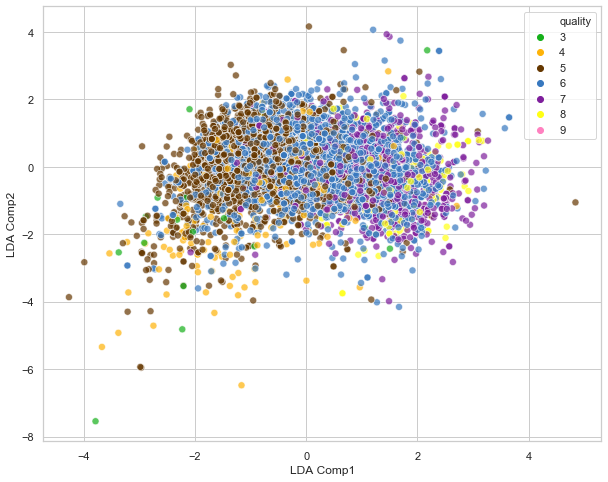

In [125]:
#Plotting LDA1 and LDA2
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 8))
colors = ["green", "amber", "brown", "windows blue", "purple", "yellow", "pink"]
sns.scatterplot(ax = ax, x="LDA Comp1", y="LDA Comp2", alpha = 0.7, s = 50,
                hue="quality", data=LDA_df, palette=sns.xkcd_palette(colors))

From above scatter plot we can say that, LDA is some what better when compared with PCA. However, classes were too close and it would be a problem when doing classification but when we compare with PCA it can give better classification accuracy.

In [126]:
#Splitting dataset into train-80% and test-20%
ran = 42
X_train, X_test, Y_train, Y_test = train_test_split(LDA_comp, labels, test_size=0.2, random_state = ran)
print(X_train.shape)
print(X_test.shape)

(5197, 5)
(1300, 5)


# Running The Same KNN Weighting Schemes For LDA

In [127]:
#KNN Classifier using LDA, Quality as output and uniform as weighting 
n_neighborslist = list(range(1,50))
col_names=['uniform']
accarray = np.zeros((len(n_neighborslist),1))

#add multiple plots to same chart, one for each weighting approach
acc_uniform=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(X_train, Y_train)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(Y_test, y_pred)
    acc_uniform.at[k,col_names[0]] = accscore

acc_uniform.describe()
acc_uniform.head()

uniform
0  0.000000
1  0.606154
2  0.550000
3  0.546154
4  0.565385

In [128]:
#KNN Classifier using LDA, Quality as output, P=1(manhattan) and distance as weighing scheme
n_neighborslist = list(range(1,50))
col_names=['distance']
accarray = np.zeros((len(n_neighborslist),1))

#add multiple plots to same chart, one for each weighting approach
acc_man=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = KNeighborsClassifier(n_neighbors=k, weights=col_names[0], p=1)
    neigh.fit(X_train, Y_train)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(Y_test, y_pred)
    acc_man.at[k,col_names[0]] = accscore

acc_man.describe()
acc_man.head()

distance
0  0.000000
1  0.608462
2  0.608462
3  0.623077
4  0.633846

In [129]:
#KNN Classifier using LDA, Quality as output, P=2(Euclidean) and distance as weighing scheme
n_neighborslist = list(range(1,50))
col_names=['distance']
accarray = np.zeros((len(n_neighborslist),1))

#add multiple plots to same chart, one for each weighting approach
acc_euc=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = KNeighborsClassifier(n_neighbors=k, weights=col_names[0], p=2)
    neigh.fit(X_train, Y_train)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(Y_test, y_pred)
    acc_euc.at[k,col_names[0]] = accscore

acc_euc.describe()
acc_euc.head()

distance
0  0.000000
1  0.606154
2  0.606154
3  0.623846
4  0.646923

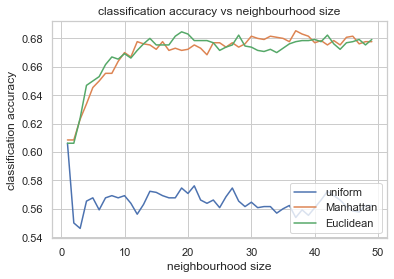

In [130]:

plt.plot(acc_uniform[1:],label="uniform")
plt.plot(acc_man[1:],label="Manhattan")
plt.plot(acc_euc[1:],label="Euclidean")
plt.legend(loc='lower right')
plt.title('classification accuracy vs neighbourhood size')
plt.xlabel('neighbourhood size')
plt.ylabel('classification accuracy')
plt.show()